# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No-show Appointment dataset records information about whether the patients showed up for a medical appointment in Brazil. There are 14 columns and over 100k rows(samples). The response variable is No-show, which suggests whether a patient shows up for the appointment. The explanatory variable include patient id, appointment id, gender etc. 


### Question(s) for Analysis
- **Question 1**: How does **gender** influence the probability of show-up? Is a gender less likely to show up for the appointment?
- **Question 2**: Does the **waiting time** (date difference between the **schedule and appointment date**) impact the probability of show-up? If a patient has to wait for a long time, will they give up seeing a doctor?
- **Question 3**: How does **age** affects the probability of show-up? Are young people more likely to miss a medical appointment?
- **Question 4**: Are patients receiving **financial aids (scholarship)** more likely to show up for an appointment?
- **Question 5**: How does **handicap** affects the probability of show-up? Are patients **using handicap** less likely to show up for an appointment?
- **Question 6**: Does receiving **SMS** increase patients probability of showing up?

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [6]:
# Import data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [7]:
# Check the head of the data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Check the shape of the dataset
df.shape

(110527, 14)

There is 110527 samples and 14 variables in the no-show appointment dataset.

In [9]:
# Check data information for missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There is no missing data in this dataset
- **Some data types are wrong**: 
 - PatientId should be string
 - AppointmentID should be string
 - ScheduledDay should be date-time
 - AppointmentDay should be date-time
 - No-show should be integer
- Also, we can do something to make the analysis easier
 - Change 'Gender' to 'female' and represent the gender with 0 (male) and 1(female). Data type: int
 - Change 'No-show' to 'show_up' to make it less misleading. Represent show up with 1 and no show with 0. Data type: int

In [10]:
# Check if there is any null value
df.isnull().sum().any()

False

In [11]:
# Check if there is any duplicates
df.duplicated().sum()

0

There is no duplicated rows in the dataset

In [12]:
# Check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- There is more than 110k appointment information for more than 62k patients. 
- There are more than 100k schedule day, but only 27 appointment day.
- There are 104 unique ages - probably need to investigate if there is an error.
- There are 5 unique values of handicap - probably need to investigate if there is an error.

In [13]:
# Check the description of the data to explore abnormal values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- **The min age is -1**, which is an obvious error - Need to modify or clean the data.
- **The max handicap is 4**, but the categorical variable is only supposed to have 0 and 1 - Need to modify or clean the data


### Data Cleaning
 

1. Change the column names

In [14]:
# Change the hyphen to underscore
df.rename(columns = {'No-show':'no_show'}, inplace = True)

In [15]:
# Change all characters to lowcase
df.rename(columns = lambda x: x.lower(), inplace = True)

In [16]:
# Check results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


2. Change data types

In [17]:
# patientid and appointmentid - to str
df.patientid = df.patientid.astype(str)
df.appointmentid = df.appointmentid.astype(str)

In [18]:
# gender - change to female, use 0 and 1 to represent two genders and change dtype to int
df.rename(columns = {'gender':'female'}, inplace = True)
labels = {'M':'0', 'F':'1'}
df.female = df.female.map(labels)
df.female = df.female.astype(int)

In [19]:
# Check results
df.head()

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
# scheduledday and appointmentday - to datetime
df.scheduledday = pd.to_datetime(df.scheduledday).dt.date.astype('datetime64[ns, UTC]')
df.appointmentday = pd.to_datetime(df.appointmentday)

# Check results
df[['scheduledday', 'appointmentday']].info()
print(df[['scheduledday', 'appointmentday']].head())
print(df[['scheduledday', 'appointmentday']].tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   scheduledday    110527 non-null  datetime64[ns, UTC]
 1   appointmentday  110527 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB
               scheduledday            appointmentday
0 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
1 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
2 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
3 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
4 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
                    scheduledday            appointmentday
110522 2016-05-03 00:00:00+00:00 2016-06-07 00:00:00+00:00
110523 2016-05-03 00:00:00+00:00 2016-06-07 00:00:00+00:00
110524 2016-04-27 00:00:00+00:00 2016-06-07 00:00:00+00:00
110525 2016-04-27 00:00:00+00:00 2016-06-07 00

In [21]:
# no_show - change to show_up and use 1 to represent show_up, 0 to represent no_show
df.rename(columns = {'no_show':'show_up'}, inplace = True)
labels_show_up = {'No':'1', 'Yes':'0'}
df.show_up = df.show_up.map(labels_show_up)
# Check results
df.head()

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,29872499824296.0,5642903,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438.0,5642503,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951.0,5642549,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183.0,5642494,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [22]:
# Change data type of show_up
df.show_up = df.show_up.astype(int)

# Check result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   female          110527 non-null  int32              
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  show_up       

3. Deal with abnormal values in the data set

In [23]:
# The min age is -1, which is impossible
df[df.age < 0]

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
99832,465943158731293.0,5775010,1,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [24]:
# Drop this sample
df.drop(99832, inplace = True)

In [25]:
# Check result
df[df.age < 0]

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


In [26]:
# Deal with the abnormal values of handcap
df[df.handcap > 1]

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
946,72825819926211.0,5582483,0,2016-04-14 00:00:00+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,1
1665,12429193284112.0,5525497,0,2016-03-30 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,1
1666,12429193284112.0,5525498,0,2016-03-30 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2071,12429193284112.0,5640120,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2091,14918292313383.0,5638626,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643.0,5756931,1,2016-06-01 00:00:00+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,1
109484,358949459162675.0,5752442,0,2016-05-31 00:00:00+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,1
109733,566297621534644.0,5772744,1,2016-06-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,1
109975,45221851115953.0,5766970,0,2016-06-02 00:00:00+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,1


In [27]:
# Don't know if the values larger than 1 equal to '1' (True), so I decide to drop all of them
handcap = df[df.handcap >1]
df = df.drop(handcap.index, axis = 0)

In [28]:
# Check result
df[df.handcap >1]

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


4. Create new variable(s)

In [29]:
# Calculate the waiting time and create a new variable 
df['date_difference'] = (df.appointmentday - df.scheduledday).dt.days

# Check result
df.head()

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,date_difference
0,29872499824296.0,5642903,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438.0,5642503,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951.0,5642549,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174.0,5642828,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183.0,5642494,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [30]:
# Check the detailed information of the new variable
df['date_difference'].describe()

# The min value is -6
# There should not be negative numbers in this column since the schedule day should before the apoointment day

count    110327.000000
mean         10.186971
std          15.257836
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: date_difference, dtype: float64

In [31]:
# Check negative values in the column
date = df[df['date_difference'] < 0]
date

,patientid,appointmentid,female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,date_difference
27033,7839272661752.0,5679978,0,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1
55226,7896293967868.0,5715660,1,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1
64175,24252258389979.0,5664962,1,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-1
71533,998231581612122.0,5686628,1,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-6
72362,3787481966821.0,5655637,0,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,-1


In [32]:
# Eliminate the samples with negative date_difference
df = df.drop(date.index, axis = 0)

In [33]:
# Check elinimation result
df[df.date_difference < 0].sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

In [40]:
# define a function to check the show-up and no-show appointments of each variable
def total_count(column, group_by):
    return df.groupby(group_by)[column].count()

In [50]:
def whole_countplt(column, group_by, dataset):
    return sns.countplot(x = column, hue = group_by, data = dataset)
            xtick_labels = ['No-show', 'Show-up']
            gender_count.set_xticklabels(xtick_labels)
            gender_count.set_xlabel('Appointment')

IndentationError: unexpected indent (<ipython-input-50-4258b2ef3f21>, line 3)

<AxesSubplot:xlabel='show_up', ylabel='count'>

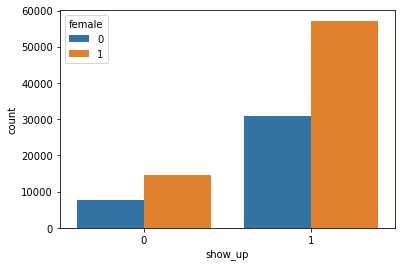

In [49]:
whole_countplt(df.show_up, df.female, df)

### 1. How does gender influence the probability of show-up? Is a gender less likely to show up for the appointment? 

In [42]:
# Check the show-up and no-show appointments of each gender
total_count(['patientid'], ['show_up', 'female'])

patientid
show_up female           
0       0            7708
        1           14565
1       0           30887
        1           57162

In [91]:
# Total number of each gender
df.groupby('female')['patientid'].count()

female
0    38595
1    71727
Name: patientid, dtype: int64

In [92]:
# Show-up appoinetments for each gender
df[df.show_up == 1].groupby('female')['patientid'].count()

female
0    30887
1    57162
Name: patientid, dtype: int64

In [93]:
# Percentage of show-up appointment of each gender
gender_ratio = df[df.show_up == 1].groupby('female')['patientid'].count()/df.groupby('female')['patientid'].count()
print(gender_ratio)

female
0    0.800285
1    0.796938
Name: patientid, dtype: float64


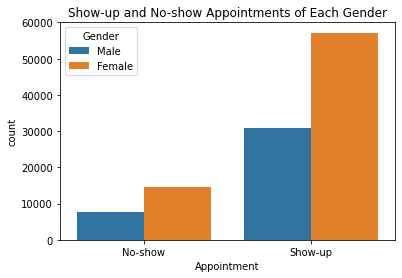

In [94]:
# Visualize the show-up and no-show appointments of each gender
gender_count = sns.countplot(x = df.show_up, hue = df.female, data = df)
xtick_labels = ['No-show', 'Show-up']
gender_count.set_xticklabels(xtick_labels)
gender_count.set_title('Show-up and No-show Appointments of Each Gender')
gender_count.set_xlabel('Appointment')
gender_count.legend(['Male','Female'], title = 'Gender');

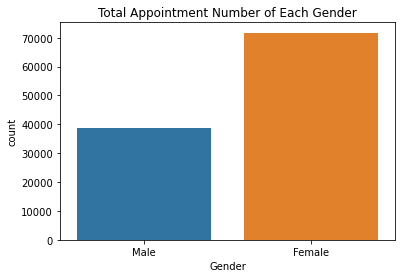

In [95]:
# Visualize total appointment number each gender
gender_show = sns.countplot(x = df.female, data = df)
gender_show.set_title('Total Appointment Number of Each Gender')
xtick_labels = ['Male', 'Female']
gender_show.set_xticklabels(xtick_labels)
gender_show.set_xlabel('Gender');

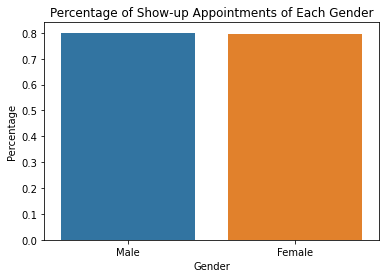

In [96]:
# Visualize the show-up percentage of each gender
gratio = sns.barplot(x = gender_ratio.index, y = gender_ratio)
gratio.set_title('Percentage of Show-up Appointments of Each Gender');
gratio.set_xlabel('Gender')
xtick_labels = ['Male', 'Female']
gratio.set_xticklabels(xtick_labels)
gratio.set_ylabel('Percentage');

From the above analysis, we can see that 

- There are more female scheduling appointments than male, so female absolute number exceeds male in both show-up and no-show appointments
- However, the percentage of show-up appointment of each gender (0.800244 for male and 0.796905 for female)shows that **female is less likely than male to attend an appointment** 
- Lastly, the two numbers are very **close** . **So gender does not play an important role in impacting the possibility of no-show**.

### 2. Does the waiting time (date difference between the schedule and appointment date) impact the probability of show-up?

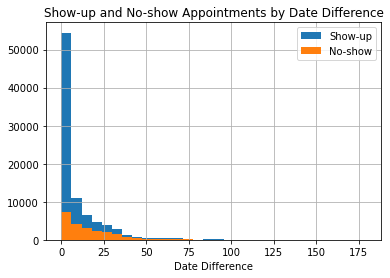

In [98]:
# Visualize show-up and no-show appointments by date difference
df[df.show_up == 1].groupby('show_up')['date_difference'].hist(bins = 30)
df[df.show_up == 0].groupby('show_up')['date_difference'].hist(bins = 30)
plt.title('Show-up and No-show Appointments by Date Difference')
plt.xlabel('Date Difference')
plt.legend(['Show-up','No-show']);

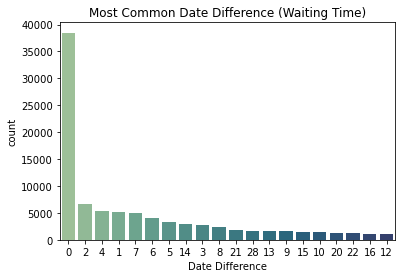

In [167]:
# Visualize the count of each date difference value
sns.countplot(x = df.date_difference, order = df.date_difference.value_counts().iloc[:20].index, palette = 'crest')
plt.title('Most Common Date Difference (Waiting Time)')
plt.xlabel('Date Difference');

In [182]:
# Calculate the percentage of the first four items
percentage = (df.date_difference.value_counts().iloc[:4].sum()/df.date_difference.value_counts().sum())*100
print('More than {}% of people schedule an appointment 0 to 4 days ago.'.format(percentage.round(2)))

More than 50.47% of people schedule an appointment 0 to 4 days ago.


In [185]:
# Calculate the percentage of the first item
percentage0 = (df.date_difference.value_counts().iloc[:1].sum()/df.date_difference.value_counts().sum())*100
print('{}% of people schedule an appointment on the same day.'.format(percentage0.round(2)))

34.88% of people schedule an appointment on the same day.


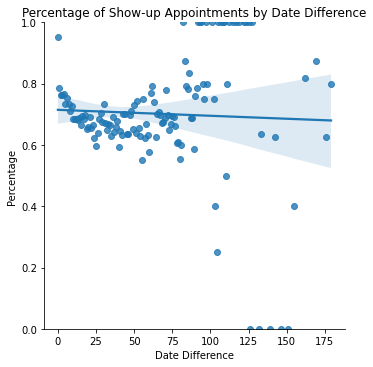

In [142]:
# Visualize the percentage of show-up appointments by date difference
wait = pd.crosstab(index = df.date_difference, columns = df.show_up).reset_index()
wait['prob_show'] = wait[1] / (wait[1] + wait[0])
sns.lmplot(x = 'date_difference', y = 'prob_show', data = wait, fit_reg = True)
plt.title('Percentage of Show-up Appointments by Date Difference')
plt.xlabel('Date Difference')
plt.ylabel('Percentage')
plt.ylim(0, 1);

The above visualization explains that

- In most cases, there are more people show up for the appointment than missing appointment regardless of the waiting time
- More than **50.47%** of people schedule an appointment **0 to 4** days ago and **34.88%** of people schedule an appointment on the **same** day
- **Waiting time impacts the probability of showing up**. The show-up probability tends to decrease as the waiting time increases. However, the tendency is not so **strong**.

### 3. How does age affects the probability of show-up? Are young people more likely to miss an medical appointment?

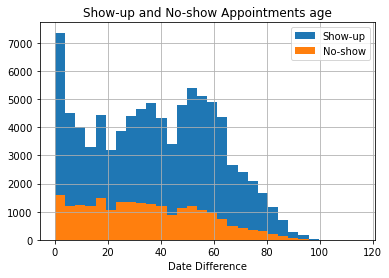

In [130]:
# Visualize show-up and no-show appointments by age
df[df.show_up == 1].groupby('show_up')['age'].hist(bins = 30)
df[df.show_up == 0].groupby('show_up')['age'].hist(bins = 30)
plt.title('Show-up and No-show Appointments age')
plt.xlabel('Date Difference')
plt.legend(['Show-up','No-show']);

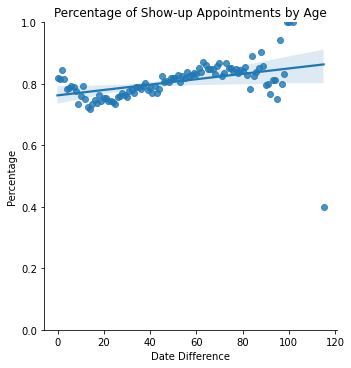

In [141]:
# Visualize the percentage of show-up appointments by date difference
ag = pd.crosstab(index = df.age, columns = df.show_up).reset_index()
ag['prob_show'] = ag[1] / (ag[0] + ag[1])
sns.lmplot(x = 'age', y = 'prob_show', data = ag, fit_reg = True)
plt.title('Percentage of Show-up Appointments by Age')
plt.xlabel('Date Difference')
plt.ylabel('Percentage')
plt.ylim(0, 1);

The information we can get from the above visualization is

- In most cases, there are more people show up for the appointment than missing appointment regardless of their age
- **Age impacts the probability of showing up**. The show-up probability tends to increase as the waiting time increases, which means young people are more likely to miss an appointment than old people.
- The tendency is **moderately strong**. We can use age to predict whether a patient will show up for an appointment or not.

### 4. Are patients receving financial aid (scholarship) more likely to show up for an appointment?

In [43]:
# Check the show-up and no-show appointment of people with or without the scholarship
total_count(['patientid'], ['scholarship', 'female'])

patientid
scholarship female           
0           0           36592
            1           62887
1           0            2003
            1            8840

In [47]:
# Check total appointment number of people with or without the scholarship
df.groupby('scholarship')['patientid'].count()

scholarship
0    99484
1    10843
Name: patientid, dtype: int64

In [48]:
# Check show-up appointments of people with or without the scholarship
scholar_ratio = df[df.show_up == 1].groupby('scholarship')['patientid'].count()/df.groupby('scholarship')['patientid'].count()
print(scholar_ratio)

scholarship
0    0.801968
1    0.762335
Name: patientid, dtype: float64


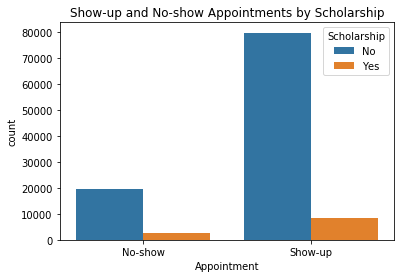

In [55]:
# Visualize the show-up and no-show appointment of people with or without the scholarship
scholar_count = sns.countplot(x = df.show_up, hue = df.scholarship, data = df)
scholar_count.set_title('Show-up and No-show Appointments by Scholarship')
xtick_labels = ['No-show', 'Show-up']
scholar_count.set_xticklabels(xtick_labels)
scholar_count.set_xlabel('Appointment')
scholar_count.legend(['No', 'Yes'], title = 'Scholarship');

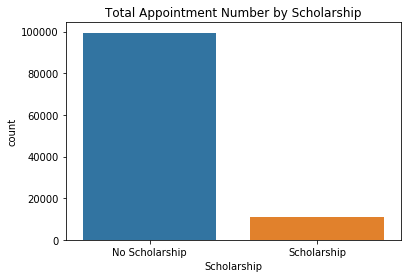

In [59]:
# Visualize the total appointment number of people with or without the scholarship
scholar_show = sns.countplot(x = df.scholarship, data = df)
scholar_show.set_title('Total Appointment Number by Scholarship')
scholar_show.set_xlabel('Scholarship')
xtick_labels = ['No Scholarship', 'Scholarship']
scholar_show.set_xticklabels(xtick_labels);

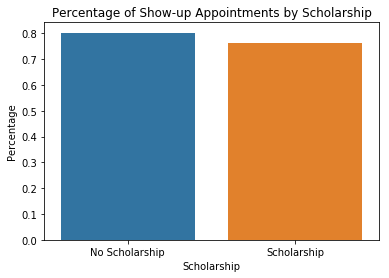

In [62]:
# Visualize the percentage of show-up appointment by scholarship
sratio = sns.barplot(x = scholar_ratio.index, y = scholar_ratio)
sratio.set_title('Percentage of Show-up Appointments by Scholarship')
sratio.set_xlabel('Scholarship')
xtick_labels = ['No Scholarship', 'Scholarship']
sratio.set_xticklabels(xtick_labels)
sratio.set_ylabel('Percentage');

From the above analysis, we can figure out that

- There are only about **10k** patients with the scholarship(financial aid). More than **99k** of the patients do not have the scholarship
- About **80%** patients without the scholarship and **76%** patients with the scholarship show up for an appointment. **People with the scholarship is less likely to show up for an appointment**.
- **Scholarship is a feature that can help us determine whether a patient will show up for an appointment**.

### 5.  How does handicap affects the probability of show-up?Are patients using handicap less likely to show up for an appointment?

In [44]:
# Check the show-up and no-show appointment of people with or without a handicap
total_count(['patientid'], ['handcap', 'female'])

patientid
handcap female           
0       0           37735
        1           70547
1       0             860
        1            1180

In [66]:
# Check total appointment number of people with or without a handicap
df.groupby('handcap')['patientid'].count()

handcap
0    108285
1      2042
Name: patientid, dtype: int64

In [69]:
# Check the percentage of show-up appointments of people with or without a handicap
hand_ratio = df[df.show_up == 1].groupby('handcap')['patientid'].count()/df.groupby('handcap')['patientid'].count()
print(hand_ratio)

handcap
0    0.797645
1    0.820764
Name: patientid, dtype: float64


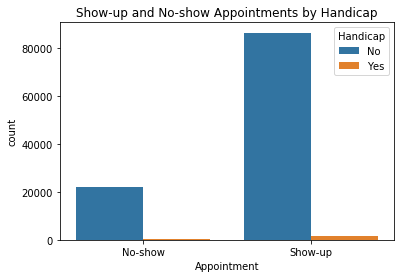

In [87]:
# Visualize the show-up and no-show appointment of people with or without a handicap
hand_count = sns.countplot(x = df.show_up, hue = df.handcap, data = df)
hand_count.set_title('Show-up and No-show Appointments by Handicap')
hand_count.set_xlabel('Appointment')
xtick_labels = ['No-show', 'Show-up']
hand_count.set_xticklabels(xtick_labels)
hand_count.legend(['No','Yes'] , title = 'Handicap');

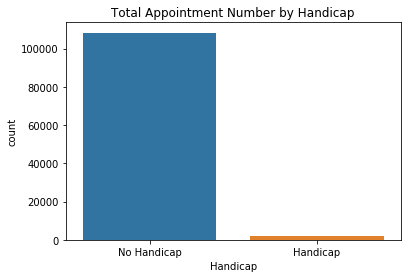

In [79]:
# Visualize the total appointment number of people with or without a handicap
hand_show = sns.countplot(x = df.handcap, data = df)
hand_show.set_title('Total Appointment Number by Handicap')
hand_show.set_xlabel('Handicap')
xtick_labels = ['No Handicap', 'Handicap']
hand_show.set_xticklabels(xtick_labels);

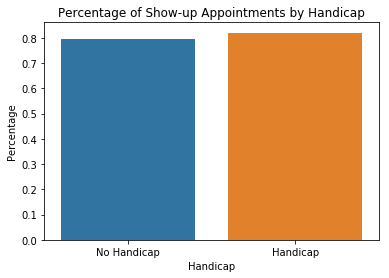

In [85]:
# Visualize the percentage of show-up appointment for people with or without a handicap
hratio = sns.barplot(x = hand_ratio.index, y = hand_ratio)
hratio.set_title('Percentage of Show-up Appointments by Handicap')
hratio.set_xlabel('Handicap')
hratio.set_ylabel('Percentage')
xtick_labels = ['No Handicap', 'Handicap']
hratio.set_xticklabels(xtick_labels);

From the analysis, we can make the following conclusions

- Most of the patients (more than 108k) does not have a handicap, while only 2042 patients have a handicap
- About 79.8% patients without a handicap show up in an appointment. Approximately 82.1% patients with a handicap show up in an appoinment. **Patients using handicap are more likely to attend an appointment than those who don't use a handicap**
- **Handicap is a useful variable that can help us predict if patients will show up for an appointment**  

### 6. Does receiving SMS increase patients probability of showing up for an appointment?

In [45]:
# Check the show-up and no-show appointment of people receive SMS or not
total_count(['patientid'], ['sms_received', 'female'])

patientid
sms_received female           
0            0           27337
             1           47550
1            0           11258
             1           24177

In [67]:
# Check total appointment number of people receiving SMS or not
df.groupby('sms_received')['patientid'].count()

sms_received
0    74892
1    35435
Name: patientid, dtype: int64

In [70]:
# Check the percentage of show-up appointments of people receiving SMS or not
sms_ratio = df[df.show_up == 1].groupby('sms_received')['patientid'].count()/df.groupby('sms_received')['patientid'].count()
print(sms_ratio)

sms_received
0    0.833053
1    0.724143
Name: patientid, dtype: float64


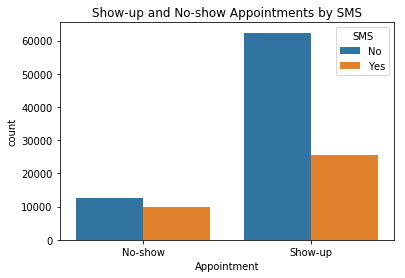

In [88]:
# Visualize the show-up and no-show appointment of people receiving SMS or not
sms_count = sns.countplot(x = df.show_up, hue = df.sms_received, data = df)
sms_count.set_title('Show-up and No-show Appointments by SMS')
sms_count.set_xlabel('Appointment')
xtick_labels = ['No-show', 'Show-up']
sms_count.set_xticklabels(xtick_labels)
sms_count.legend(['No', 'Yes'], title = 'SMS');

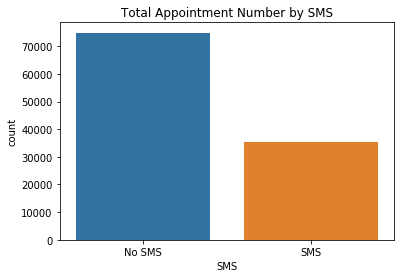

In [89]:
# Visualize the total appointment number of people receiving SMS or not
sms_show = sns.countplot(x = df.sms_received, data = df)
sms_show.set_title('Total Appointment Number by SMS')
sms_show.set_xlabel('SMS')
xtick_labels = ['No SMS', 'SMS']
sms_show.set_xticklabels(xtick_labels);

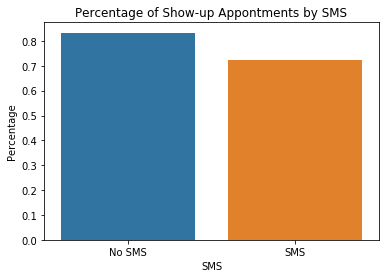

In [92]:
# Visualize the percentage of show-up appointment for people receiving SMS or not
smratio = sns.barplot(x = sms_ratio.index, y = sms_ratio)
smratio.set_title('Percentage of Show-up Appontments by SMS')
smratio.set_xlabel('SMS')
smratio.set_ylabel('Percentage')
xtick_labels = ['No SMS', 'SMS']
smratio.set_xticklabels(xtick_labels);

We can know the following information from the above analysis

- About **74k** patients did not receive an sms before their appointments. More than **35k** patients recevie an sms
- About **83.3%** patients who did not receive an sms show up in an appointment. Approximately **72.4%** patients who received an sms show up in an appoinment. **Patients who did not receive an sms are more likely to attend an appointment than those who received an sms**
- **sms_received is a feature that we can use to predict the show-up/no-show appointments.**

<a id='conclusions'></a>
## Conclusions

In conclusion, we can know that **waiting time(date_difference), age, scholarship, handicap and sms(sms_received)** are the variables that can be used to predict if a patient will come to his appointment. In contrast, **gender** does not play a big role. 

### Limitations

- Need more background knowledge and information to explain the reasons behind the conclusions, especially the counter-intuitive ones. 
- Can build machine learning models for analysis to get more accurate results.

## References

- Kaggle - Applying heatmaps for categorical data analysis. https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis.
- Kaggle - Predicting Show-Up/No-Show. https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show.
- Kaggle - Predict Show/NoShow+EDA+Visualizations. https://www.kaggle.com/ibrahimmansey/predict-show-noshow-eda-visualizations.
- Kaggle - Predict Show/NoShow - EDA+Visualization+Model. https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model.
- Kaggle - Data Analyst Nanodegree project - first attempt. https://www.kaggle.com/kuroski/data-analyst-nanodegree-project-first-attempt/notebook